In [1]:
from pandas import read_csv
import numpy as np

In [2]:
df = read_csv('international-airline-passengers.csv',usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int(values.shape[0]*0.67)
test_size = values.shape[0] - train_size
train = values[0:train_size]
test = values[train_size:]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [6]:
def create_dataset(data,k):
    dataX,dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i+k,0]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)

In [7]:
test.shape

(48, 1)

In [8]:
look_back = 12
trainX,trainY = create_dataset(train,look_back)
testX,testY = create_dataset(test,look_back)

In [9]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [10]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1)

Epoch 1/100
84/84 [==============================] - 1s 1ms/step - loss: 0.0308
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 8/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 9/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 10/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 11/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 12/100
84/84 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 13/100
84/84 [=================

In [11]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape,testTrue.shape

((36,), (36,))

In [12]:
from matplotlib import pyplot as plt

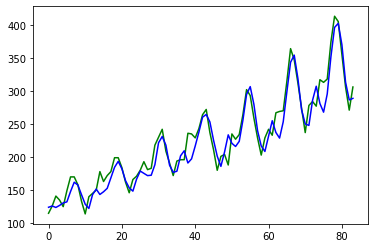

In [13]:
plt.plot(trainTrue,c='g')
plt.plot(trainPredict,c='b')
plt.show()

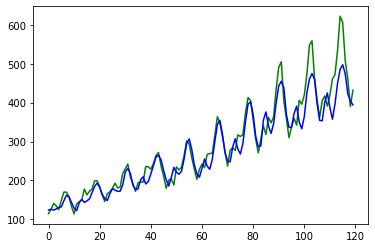

In [16]:
combinedPredicted = np.concatenate((trainPredict,testPredict))
combinedTrue = np.concatenate((trainTrue,testTrue))
plt.plot(combinedTrue,c='g')
plt.plot(combinedPredicted,c='b')
plt.show()